
# ***Problem statement***



## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING REQURE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#READ CSV FILE
df1 = pd.read_csv('/content/drive/MyDrive/Data/Play_Store_Data.csv')
#useless Data
df1 = df1.drop(10472).reset_index(drop = True)
df1 = df1.drop(9148).reset_index(drop = True)

In [ ]:
#TOP 5 ROWS OF DATASET
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# LAST 5 ROWS OF DATASET
df1.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10836,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10838,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# NO OF ROWS AND COLUMN IN DATASET
df1.shape

(10839, 13)

WE HAVE 10839 ROWS AND 13 COLUMNS IN OUR DATASET

In [ ]:
# USE INFO FUNCTION, TO KNOW THE NULL VALUES PRESENT IN OUR DATASET AND DATA TYPE OF COLUMNS
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**We have 13 column in our dataset, 12 of them are object type and only rating column is float**

# **After observing the data, we make questions on it.** 

**Following are the questions.**

Q.1) Best top 3 Category App with respect to Size for both type (Free and Paid).

Q.2) Percentage of Free and Paid App.

Q.3) Correlation between Year and Minimum android version required.

Q.4) Distribution of App by Category.

Q.5) Most review apps category wise.

Q.6) Number of apps present in play store category wise(Free & Paid).

Q.7) Pearson Correlation – Price, Install, Size, Reviews, Rating.

Q.8) Distribution of App by Content Rating.

Q.9) Mean of (Size, Review and Install) of each Category.

Q.10) Rating distribution of Apps.

Q.11) Variation of App with respect to Year.

Q.12) Top five Revenue App.

Q.13) Distribution of Category by Install.

Q.14) Percentage of Positive, Negative and Neutral.

Q.15) Sentiment Polarity vs Sentiment Subjectivity.

# **Data Cleaning**

In [ ]:
#Converting Review column into integer Type
def get_int(elem):
    return(int(elem))

df1['Reviews'] =df1.apply(lambda x: get_int(x['Reviews']), axis = 1)

In [ ]:
#Removing outliers of size column
def get_size(elem):
  if elem[-1] != 'M':
    return('1M')
  else:
    return(elem)

df1['Size'] =df1.apply(lambda x: get_size(x['Size']), axis = 1)

#Making size column as float
def get_size_float(elem):
  return(eval(elem[0:-1]))


df1['Size_in_mb'] =df1.apply(lambda x: get_size_float(x['Size']), axis = 1)

In [ ]:
#Making Install column as integer
def get_install(elem):
  if elem[-1] == '+':
    elem =elem[0:-1]
    y= elem.split(',')
    y = ''.join(y)
    return(eval(y))
  else:
    return(eval(elem))

df1['Installs'] = df1.apply(lambda x: get_install(x['Installs']), axis = 1)

In [ ]:
#Filling null values in Rating column
df1['Rating'].fillna(0.0, inplace = True)


In [ ]:
#Convert data type of price into float
def get_Price(elem):
  if elem[0] == '$':
    elem =elem[1:]
    return(eval(elem))
  else:
    return(eval(elem))

df1['dollar_price'] = df1.apply(lambda x: get_Price(x['Price']), axis = 1)

#fill null value in current ver
df1['Current Ver'].fillna(0.0, inplace = True)

In [ ]:
#fill null values and converting data type of Android Ver into Float
df1['Android Ver'].fillna('4.0', inplace = True)
def get_ver(elem):
  if elem != 'Varies with device':
    elem =elem[0:3]
    return(eval(elem))
  else:
    return(eval('4.0'))

df1['min_Android_Ver'] = df1.apply(lambda x: get_ver(x['Android Ver']), axis = 1)

In [ ]:
#Extract year from Last Updated column
def get_year(elem):
  elem =elem[-4:]
  return(eval(elem))

df1['year'] = df1.apply(lambda x: get_year(x['Last Updated']), axis = 1)

In [ ]:
#Create new Data frame to store all the clean and required values for EDA
data_needed = ['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'year', 
       'Price', 'Content Rating', 'Size_in_mb', 'dollar_price', 'min_Android_Ver']
df_new = df1[data_needed]

In [ ]:
df_new.head()

,App,Category,Rating,Reviews,Installs,Type,year,Price,Content Rating,Size_in_mb,dollar_price,min_Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,2018,0,Everyone,19.0,0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,2018,0,Everyone,14.0,0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,2018,0,Everyone,8.7,0.0,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,2018,0,Teen,25.0,0.0,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,2018,0,Everyone,2.8,0.0,4.4


In [ ]:
# saving the dataframe
df_new.to_csv('/content/drive/MyDrive/Dataout.csv')

**Let's take all of the above questions which need to be answered**

#***Data Visualization***

1.   **Best top 3 Category app less in size and paid**




In [ ]:
#Q1 Best top 3 Category app less in size for both type

top_category_app = df_new.groupby(['Category', 'Type']).agg({'Size_in_mb' : 'mean'}).sort_values(by = 'Category').reset_index()
top_category_app.head()

,Category,Type,Size_in_mb
0,ART_AND_DESIGN,Free,12.167742
1,ART_AND_DESIGN,Paid,5.200000
2,AUTO_AND_VEHICLES,Free,18.045122
3,AUTO_AND_VEHICLES,Paid,11.333333
4,BEAUTY,Free,12.347170


In [ ]:
fig = px.histogram(top_category_app, x="Category", y="Size_in_mb",
             color='Type', barmode='group',
             height=700,title='Category vs Mean Size')
fig.show()

2. **Percentage of free and paid app**



10039 800


([<matplotlib.patches.Wedge at 0x7f9ea330f910>,
 [Text(-1.070561398981594, 0.25278111284384414, 'free = 92.62%'),
  Text(1.0705614048983627, -0.252781087785546, 'paid = 7.38%')])

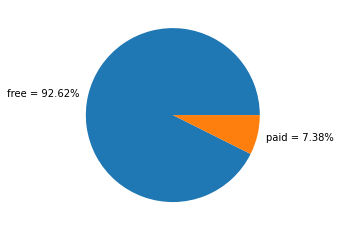

In [ ]:
#Q2 Percentage of free and paid app

free, paid = 0, 0
for elem in df_new.Type:
  if elem == 'Free':
    free = free + 1
  else:
    paid = paid +1

print(free, paid)

free_percent = round((free / (free + paid)) * 100, 2)
paid_percent = round((paid / (free + paid)) * 100, 2)

f= 'free = ' + str(free_percent) + '%'
p = 'paid = ' + str(paid_percent) + '%'
label = [f, p]
x = np.array([free, paid])
plt.pie(x,  labels = label)


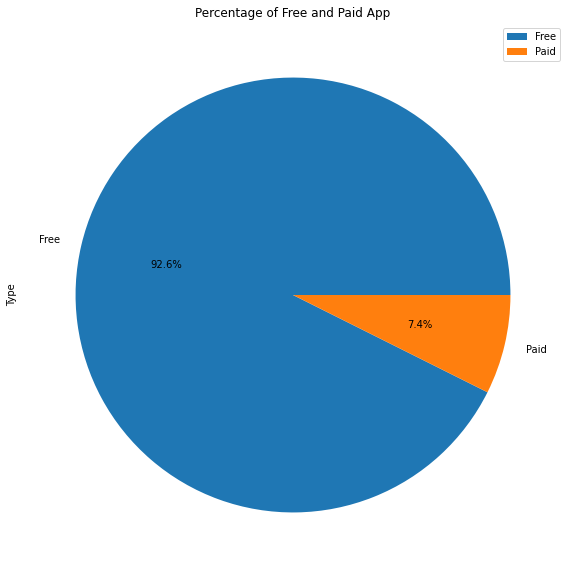

In [ ]:
df_new['Type'].value_counts().plot.pie(figsize = (15,10), autopct='%1.1f%%',title='Percentage of Free and Paid App')
plt.legend()

**3 correlation between year and minimum android version required**

   year  min_Android_Ver
0  2010              1.5
1  2011              1.6
2  2012              2.1
3  2013              2.2
4  2014              2.3


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



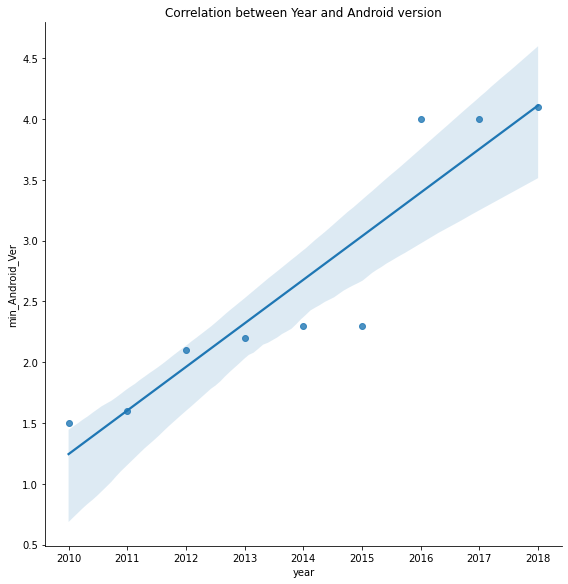

In [ ]:
# Q3 correlation between year and minimum android version required 
df_android=df_new.groupby(['year']).agg({'min_Android_Ver':'median'}).reset_index()
print(df_android.head())
sns.lmplot(x='year', y='min_Android_Ver',data=df_android,size=8).set(title='Correlation between Year and Android version')

In [ ]:
fig = px.scatter(df_android, x="year", y="min_Android_Ver", trendline="ols",title='Year vs Minimum Android Version')
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**4 Distribution of App by Category**

In [ ]:
# Q4 Distribution of App by Category
df_distri=df_new.groupby(['Category']).agg({'App':'count'}).reset_index()
df_distri.head()

,Category,App
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460


In [ ]:
fig=px.bar(df_distri,x='Category', y='App',title='Distribution of App by Category',text_auto='.2s')
fig.show()

In [ ]:
fig1 = px.pie(df_distri, values='App', names='Category', title='Distribution of App by Category')
fig1.show()

In [ ]:
#Q5 Most review apps category wise
df_most=df_new.groupby(['Category']).agg({'Reviews':'max'}).reset_index()

In [ ]:
fig=px.bar(df_most,x='Reviews', y='Category',title='Category vs Review',text_auto='.2s',height=800)
fig.show()

In [ ]:
# Q6 Number of apps present in play store category wise(free & paid)
df_num = df_new.groupby(['Category','Type']).agg({'App' : 'count'}).sort_values(by = 'Category').reset_index()


In [ ]:
fig = px.line(df_num, x='Category', y='App', color='Type', symbol="Type")
fig.show()

In [ ]:
fig = px.bar(df_num, x="App", y="Category", color="Type", title="Number of apps present in play store category wise(free & paid)", height=800,text_auto='.2s')
fig.show()

In [ ]:
#Q7 Pearson Correlation – price, install, size, reviews, rating

corr_variable = ['dollar_price', 'Installs', 'Size_in_mb', 'Reviews', 'Rating']
df_pearson_corr = df_new[corr_variable]
df_pearson_corr = df_pearson_corr.corr()

[Text(0.5, 1.0, 'Pearson Correlation – price, install, size, reviews, rating')]

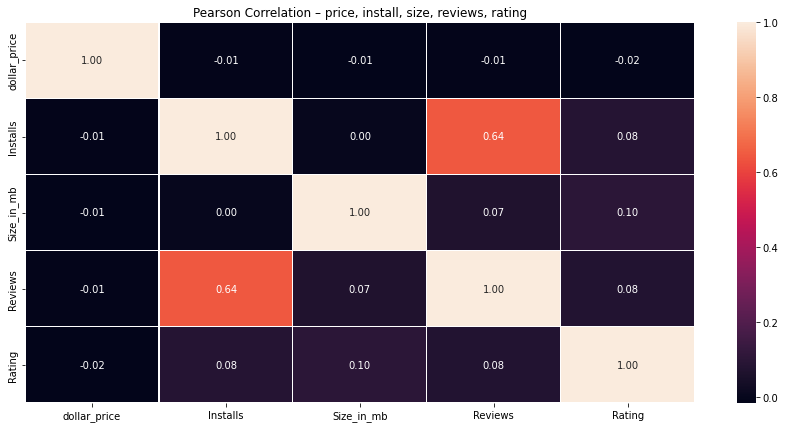

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df_pearson_corr,fmt='.2f',linewidths=0.1,annot=True).set(title='Pearson Correlation – price, install, size, reviews, rating')

In [ ]:
#Q8	Distribution of App by Content Rating
df_content_rat=df_new.groupby(['Content Rating']).agg({'App':'count'}).reset_index()
df_content_rat.head()
fig=px.bar(df_content_rat,x='Content Rating', y='App',title='Distribution of App by Content Rating',text_auto='.2s')
fig.show()

In [ ]:
fig = px.bar(df_content_rat, x="Content Rating", y="App", color="Content Rating", text="Content Rating", text_auto='.2s',title='Distribution of App by Content Rating')
fig.show()

Text(0.5, 1.0, 'Rating distribution of Apps')

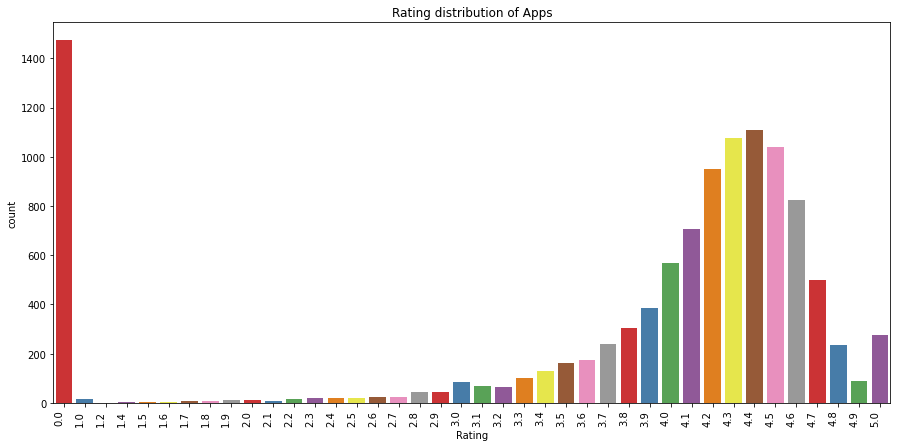

In [ ]:
#Q9 rating distribution of apps
plt.figure(figsize=(15,7))
rating_distribution = sns.countplot(x="Rating" , data=df_new, palette = "Set1")
rating_distribution.set_xticklabels(rating_distribution.get_xticklabels(), rotation=90, ha="right")
plt.title("Rating distribution of Apps")

In [ ]:
#Q10 Variation of App with respect to Year
df_year=df_new.groupby(['year']).agg({'App':'count'}).reset_index()
fig = px.bar(df_year, x="year", y="App", color="year", text="year", text_auto='.2s',title='Apps vs Year')
fig.show()

In [ ]:
#Q11 top five Revenue App

In [ ]:
def get_revenue(a,b):
  return a*b

In [ ]:
df_new['Revenue'] = df_new.apply(lambda x: get_revenue(x['Installs'],x['dollar_price']), axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_revenue=df_new.groupby(['App']).agg({'Revenue':'mean'}).sort_values(by='Revenue',ascending=False).reset_index()
df_revenue[:5]

,App,Revenue
0,Minecraft,69900000.0
1,I am rich,39999000.0
2,I Am Rich Premium,19999500.0
3,Hitman Sniper,9900000.0
4,Grand Theft Auto: San Andreas,6990000.0


In [ ]:
fig = px.bar(df_revenue[:5], x="App", y="Revenue", color="App", text="App", text_auto='.2s',title='Revenue of The Top Five App')
fig.show()

In [ ]:
#Q12 Distribution of Category by install
df_install=df_new.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False).reset_index()


In [ ]:
fig = px.bar(df_install, x="Installs", y="Category",color="Category",title='Category vs Installs', height=800)
fig.show()

#***Data Cleaning of 2nd Dataset***

In [ ]:
df_Review_data = pd.read_csv('/content/User Reviews.csv')

In [ ]:
df_Review_data.tail()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
30673,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
30674,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
30675,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
30676,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
30677,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


In [ ]:
df_Review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 30677
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
df_Review_data.drop_duplicates( keep='first', inplace=True, ignore_index=True)   # delete Duplicates Values

In [ ]:
df_Review_data.dropna(inplace=True)  # Removes All null values

#***Data Visualization***

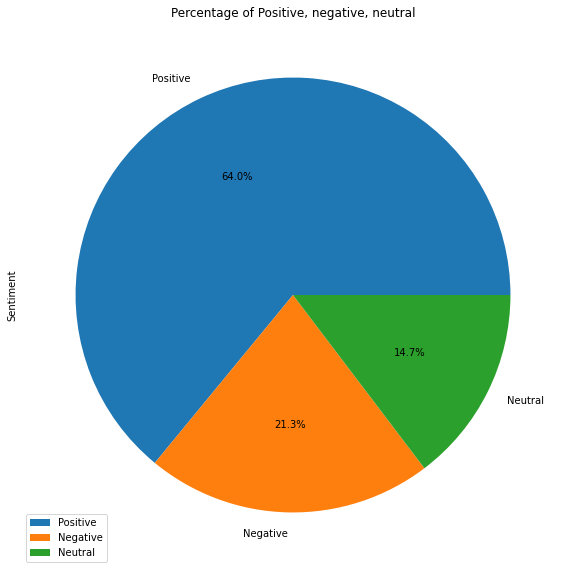

In [ ]:
#Q13 Percentage of Positive, negative and neutral 
df_Review_data['Sentiment'].value_counts().plot.pie(figsize = (15,10), autopct='%1.1f%%',title='Percentage of Positive, negative, neutral')
plt.legend()


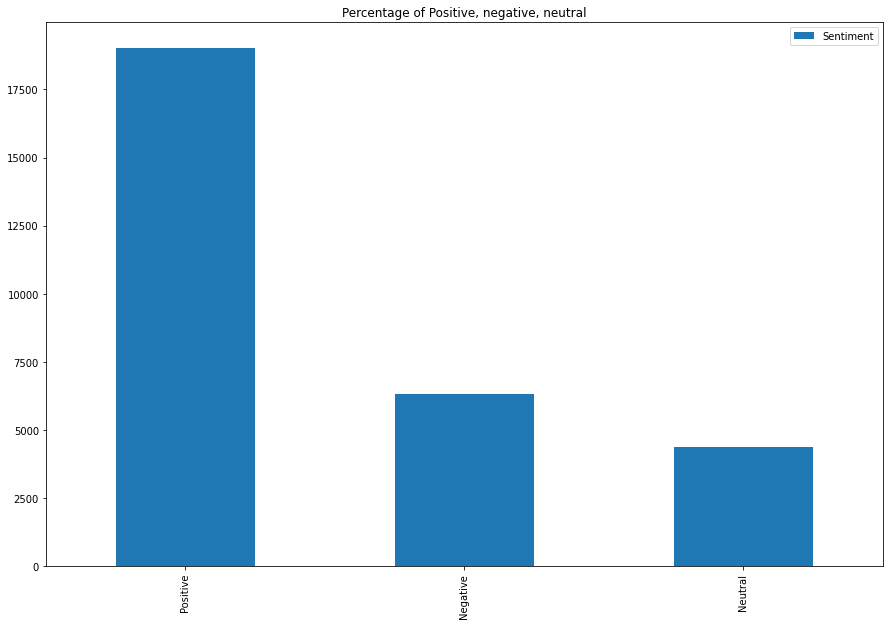

In [ ]:
df_Review_data['Sentiment'].value_counts().plot.bar(figsize = (15,10),title='Percentage of Positive, negative, neutral')
plt.legend()

In [ ]:
df_sentiment=df_Review_data['Sentiment'].value_counts().reset_index()
df_sentiment.head()

,index,Sentiment
0,Positive,19015
1,Negative,6321
2,Neutral,4356


In [ ]:
fig1 = px.bar(df_sentiment, x='index',y='Sentiment',color='index', title='Distribution of App by Category')
fig1.show()

In [ ]:
# Q14 Sentiment Polarity vs Sentiment Subjectivity
fig = px.scatter(df_Review_data, x="Sentiment_Polarity", y="Sentiment_Subjectivity", color='Sentiment',title='Polarity vs Subjectivity')
fig.show()

#***Conclusion***
After Analyzing the dataset we have got answers to some of the important & interesting questions. Which will be helps to the apps development company.

#***References***
https://plotly.com/python/

https://seaborn.pydata.org/examples/index.html

https://matplotlib.org/3.1.1/index.html
